In [3]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Библиотеки успешно импортированы!")

Библиотеки успешно импортированы!


In [29]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка файла с правильным форматом даты (день.месяц.год)
df = pd.read_csv('/Users/maximvishnevskiy/Downloads/transactions_diy.csv')

# Преобразование даты с правильным форматом - день.месяц.год
df['tr_date'] = pd.to_datetime(df['tr_date'], format='%d.%m.%Y')

print("Файл transactions_diy.csv успешно загружен!")
print(f"Размер данных: {df.shape}")
print("\nПервые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print(f"\nДиапазон дат: с {df['tr_date'].min()} по {df['tr_date'].max()}")

Файл transactions_diy.csv успешно загружен!
Размер данных: (1008688, 7)

Первые 5 строк:
     tr_date          bcode       client      item  \
0 2017-09-01  code000000001  client13166   sku8444   
1 2017-09-01  code000000001  client13166  sku12545   
2 2017-09-01  code000000001  client13166   sku3391   
3 2017-09-01  code000000001  client13166  sku20444   
4 2017-09-01  code000000002   client1239  sku29959   

                     item_group  quantity  amount  
0              Скобяные изделия         1      29  
1  Оборудование для сада и дачи         1     329  
2                   Инструменты         1     169  
3                   Инструменты         2     578  
4              Скобяные изделия         1     329  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008688 entries, 0 to 1008687
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   tr_date     1008688 non-null  datet

In [30]:
# %%
# ТОЧНО ПО ПРОМПТУ ИЗ ПРАКТИЧЕСКОЙ (Page 9):
# Проведи статистический анализ DataFrame с продажами:

# 1. Выведи общую информацию: количество строк, столбцов, типы данных
print("1. Общая информация о датасете:")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")
print("Типы данных:")
print(df.dtypes)

print("\n" + "="*60 + "\n")

# 2. Рассчитай описательную статистику для всех числовых колонок (quantity, amount): min, max, mean, std, median, 25%, 75%
print("2. Описательная статистика для числовых колонок:")
numeric_stats = df[['quantity', 'amount']].describe()
print(numeric_stats)

print("\n" + "="*60 + "\n")

# 3. Проверь наличие пропущенных значений
print("3. Проверка пропущенных значений:")
missing_values = df.isnull().sum()
print(missing_values)

print("\n" + "="*60 + "\n")

# 4. Для каждого числового столбца выведи уникальных значений и их диапазоны
print("4. Уникальные значения и диапазоны:")
for column in ['quantity', 'amount']:
    print(f"\nКолонка '{column}':")
    print(f"  Уникальных значений: {df[column].nunique()}")
    print(f"  Диапазон: [{df[column].min()}, {df[column].max()}]")
    print(f"  Медиана: {df[column].median():.2f}")

1. Общая информация о датасете:
Количество строк: 1008688
Количество столбцов: 7
Типы данных:
tr_date       datetime64[ns]
bcode                 object
client                object
item                  object
item_group            object
quantity               int64
amount                 int64
dtype: object


2. Описательная статистика для числовых колонок:
           quantity        amount
count  1.008688e+06  1.008688e+06
mean   2.222474e+00  6.231940e+02
std    5.029007e+00  1.878421e+03
min    0.000000e+00  0.000000e+00
25%    1.000000e+00  5.600000e+01
50%    1.000000e+00  1.500000e+02
75%    2.000000e+00  4.250000e+02
max    1.100000e+03  2.131770e+05


3. Проверка пропущенных значений:
tr_date       0
bcode         0
client        0
item          0
item_group    0
quantity      0
amount        0
dtype: int64


4. Уникальные значения и диапазоны:

Колонка 'quantity':
  Уникальных значений: 198
  Диапазон: [0, 1100]
  Медиана: 1.00

Колонка 'amount':
  Уникальных значений: 11181

ПЕРВОЕ ОКНО - Гистограммы распределения


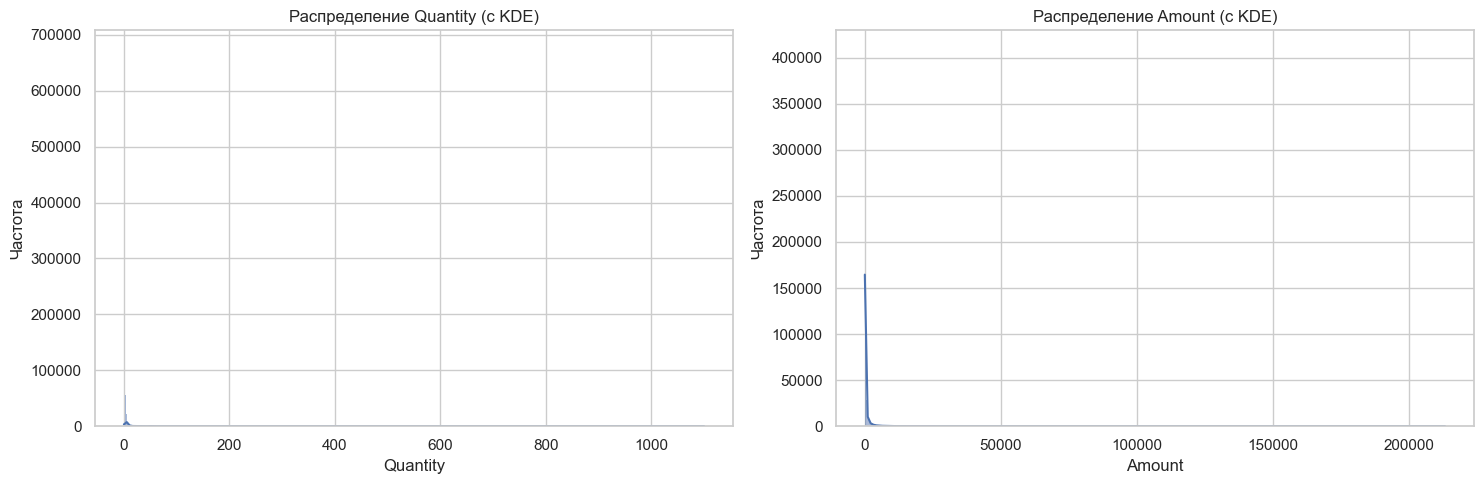



ВТОРОЕ ОКНО - Box plots


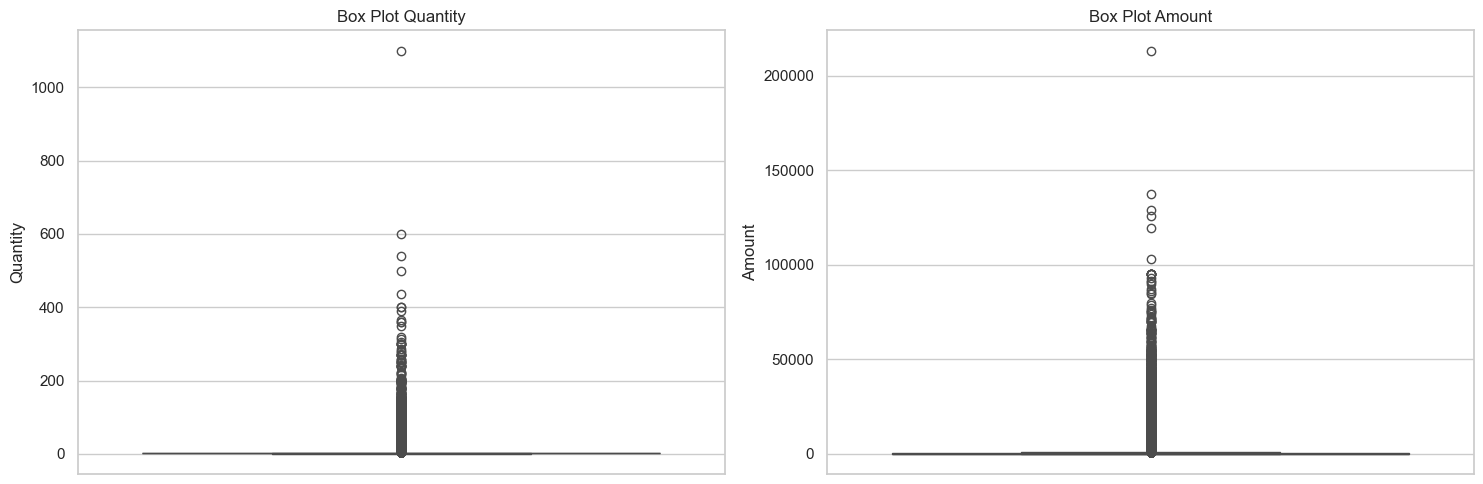

In [31]:
# %%
# ТОЧНО ПО ПРОМПТУ ИЗ ПРАКТИЧЕСКОЙ:
# Создай графики для анализа распределения quantity и amount из DataFrame df. 
# Используй sns.histplot с kde=True и sns.boxplot.
# Сделай два окна: одно с гистограммами, второе с box plot.

# Первое окно - гистограммы
print("ПЕРВОЕ ОКНО - Гистограммы распределения")
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['quantity'], kde=True, ax=ax1)
ax1.set_title('Распределение Quantity (с KDE)')
ax1.set_xlabel('Quantity')
ax1.set_ylabel('Частота')

sns.histplot(df['amount'], kde=True, ax=ax2)
ax2.set_title('Распределение Amount (с KDE)')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Частота')

plt.tight_layout()
plt.show()

print("\n" + "="*70 + "\n")

# Второе окно - box plot
print("ВТОРОЕ ОКНО - Box plots")
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df, y='quantity', ax=ax1)
ax1.set_title('Box Plot Quantity')
ax1.set_ylabel('Quantity')

sns.boxplot(data=df, y='amount', ax=ax2)
ax2.set_title('Box Plot Amount') 
ax2.set_ylabel('Amount')

plt.tight_layout()
plt.show()

In [32]:
# %%
# ТОЧНО ПО ПРОМПТУ ИЗ ПРАКТИЧЕСКОЙ:
# На основе DataFrame с продажами:
# 1. Сгруппируй данные по колонке item (товар)
# 2. Для каждого товара рассчитай сумму двух метрик: 
#    - Кол-во: sum(quantity) 
#    - Сумма продаж: sum(amount)
# 3. Отсортируй результат по сумме продаж в убывающем порядке
# 4. Выведи только ТОП-5 товаров с самыми большими продажами
# 5. Сохрани результат в переменную 'top_5_products'

top_5_products = (df.groupby('item')
                  .agg({
                      'quantity': 'sum',      # Кол-во: sum(quantity)
                      'amount': 'sum'         # Сумма продаж: sum(amount)
                  })
                  .sort_values('amount', ascending=False)  # Сортировка по сумме продаж в убывающем порядке
                  .head(5))                                # ТОП-5 товаров

print("ТОП-5 товаров с самыми большими продажами:")
print(top_5_products)

# Проверяем что переменная сохранена
print(f"\nПеременная 'top_5_products' сохранена, размер: {top_5_products.shape}")

ТОП-5 товаров с самыми большими продажами:
          quantity   amount
item                       
sku26161     18902  5373638
sku18199      7250  3951361
sku21947     15304  3918570
sku28128      7705  3027786
sku8342       3512  2113158

Переменная 'top_5_products' сохранена, размер: (5, 2)


In [33]:
# %%
# ТОЧНО ПО ПРОМПТУ:
# Создай функцию get_top_products(df, n=5)

def get_top_products(df, n=5):
    """
    Функция для получения топ-N товаров по сумме продаж
    
    Parameters:
    df - DataFrame с данными
    n - количество товаров для вывода (по умолчанию 5)
    
    Returns:
    DataFrame с n лучшими товарами
    """
    return (df.groupby('item')
            .agg({
                'quantity': 'sum',
                'amount': 'sum'
            })
            .sort_values('amount', ascending=False)
            .head(n))

print("Функция get_top_products создана!")

Функция get_top_products создана!


"Переделай предыдущий код так, чтобы число ТОП товаров было параметром (переменной N). Создай функцию get_top_products(df, n=5), которая:

Принимает DataFrame df и параметр n (количество товаров)

Выполняет группировку, сортировку и фильтрацию как в предыдущем примере

Возвращает DataFrame с n лучшими товарами
Протестируй функцию с разными значениями N."

In [34]:
# %%
# Тестируем функцию с разными значениями N

print("ТОП-3 товара:")
print(get_top_products(df, 3))

print("\n" + "="*60 + "\n")

print("ТОП-10 товаров:")
print(get_top_products(df, 10))

print("\n" + "="*60 + "\n")

print("ТОП-1 товар (самый продаваемый):")
print(get_top_products(df, 1))

ТОП-3 товара:
          quantity   amount
item                       
sku26161     18902  5373638
sku18199      7250  3951361
sku21947     15304  3918570


ТОП-10 товаров:
          quantity   amount
item                       
sku26161     18902  5373638
sku18199      7250  3951361
sku21947     15304  3918570
sku28128      7705  3027786
sku8342       3512  2113158
sku29626     13669  1973964
sku9018       3299  1706341
sku9471       5045  1675843
sku25074      6125  1668585
sku27791      8384  1645042


ТОП-1 товар (самый продаваемый):
          quantity   amount
item                       
sku26161     18902  5373638


"На основе исходного DataFrame:

Задай переменную end_date = '2019-10-31'

Задай переменную period_months = 6

Рассчитай начальную дату start_date = end_date - 6 месяцев

Отфильтруй DataFrame так, чтобы осталась только дата >= start_date и дата <= end_date

На отфильтрованных данных запусти функцию get_top_products(filtered_df, n=5)

Выведи результат"

In [35]:
# %%
# ТОЧНО ПО ПРОМПТУ:

# 1. Задай переменную end_date = '2019-10-31'
end_date = '2019-10-31'

# 2. Задай переменную period_months = 6
period_months = 6

# 3. Рассчитай начальную дату start_date = end_date - 6 месяцев
start_date = pd.to_datetime(end_date) - pd.DateOffset(months=period_months)

print(f"Период анализа: с {start_date.date()} по {end_date}")

# 4. Отфильтруй DataFrame так, чтобы осталась только дата >= start_date и дата <= end_date
filtered_df = df[
    (df['tr_date'] >= start_date) & 
    (df['tr_date'] <= pd.to_datetime(end_date))
]

print(f"Количество транзакций в периоде: {len(filtered_df)}")

print("\n" + "="*60 + "\n")

# 5. На отфильтрованных данных запусти функцию get_top_products(filtered_df, n=5)
# 6. Выведи результат
print("ТОП-5 товаров по сумме продаж за последние 6 месяцев:")
top_5_recent = get_top_products(filtered_df, n=5)
print(top_5_recent)

Период анализа: с 2019-04-30 по 2019-10-31
Количество транзакций в периоде: 350864


ТОП-5 товаров по сумме продаж за последние 6 месяцев:
          quantity   amount
item                       
sku26161      7993  2379453
sku18199      3066  1848072
sku21947      5831  1543669
sku8342       1509   970053
sku22208        89   896275


"На основе исходного DataFrame выполни анализ по клиентам:

Сгруппируй данные по client

Для каждого клиента рассчитай:

Общее количество товаров (sum(quantity))

Общую сумму закупок (sum(amount))

Количество уникальных дат визитов

Отсортируй по сумме закупок в убывающем порядке

Сохрани результат в переменную 'client_stats'. После этого выведи статистику по столбцам:

Для quantity: min, max, mean, median

Для amount: min, max, mean, median

Для количества дат визитов: min, max, mean"

In [36]:
# %%
# ТОЧНО ПО ПРОМПТУ:

# 1. Сгруппируй данные по client
# 2. Для каждого клиента рассчитай:
client_stats = (df.groupby('client')
                .agg({
                    'quantity': 'sum',           # Общее количество товаров
                    'amount': 'sum',             # Общая сумма закупок
                    'tr_date': 'nunique'         # Количество уникальных дат визитов
                })
                .rename(columns={'tr_date': 'visit_count'}))

# 3. Отсортируй по сумме закупок в убывающем порядке
client_stats = client_stats.sort_values('amount', ascending=False)

print("Статистика по клиентам (первые 10):")
print(client_stats.head(10))

print("\n" + "="*60 + "\n")

# 4. Выведи статистику по столбцам
print("СТАТИСТИКА ПО КЛИЕНТАМ:")
print(f"Всего уникальных клиентов: {len(client_stats)}")

print("\nДля quantity:")
print(f"  Min: {client_stats['quantity'].min()}")
print(f"  Max: {client_stats['quantity'].max()}")
print(f"  Mean: {client_stats['quantity'].mean():.2f}")
print(f"  Median: {client_stats['quantity'].median():.2f}")

print("\nДля amount:")
print(f"  Min: {client_stats['amount'].min()}")
print(f"  Max: {client_stats['amount'].max()}")
print(f"  Mean: {client_stats['amount'].mean():.2f}")
print(f"  Median: {client_stats['amount'].median():.2f}")

print("\nДля количества дат визитов:")
print(f"  Min: {client_stats['visit_count'].min()}")
print(f"  Max: {client_stats['visit_count'].max()}")
print(f"  Mean: {client_stats['visit_count'].mean():.2f}")

Статистика по клиентам (первые 10):
             quantity   amount  visit_count
client                                     
client29182      3434  3887309          107
client15654      5457  1443255          174
client8778       1617   986618           17
client1704       1187   636101           23
client33032      1255   537397           74
client37582      2526   502515          159
client20512      1271   431752           70
client6049       1963   431041           87
client30096      1079   429072          119
client30977      2234   407138          121


СТАТИСТИКА ПО КЛИЕНТАМ:
Всего уникальных клиентов: 42746

Для quantity:
  Min: 1
  Max: 5457
  Mean: 52.44
  Median: 21.00

Для amount:
  Min: 10
  Max: 3887309
  Mean: 14705.66
  Median: 6410.00

Для количества дат визитов:
  Min: 1
  Max: 174
  Mean: 6.18


"На основе датафрейма client_stats:

Отфильтруй клиентов, у которых: – количество товаров >= 2000 ИЛИ – Сумма >= 500000

Выведи количество найденных клиентов и их список

Покажи эти клиентов с их основными характеристиками

Опционально: сохрани их ID для дальнейшего анализа в список 'extreme_clients'"

In [37]:
# %%
# ТОЧНО ПО ПРОМПТУ:

# 1. Отфильтруй клиентов, у которых: количество товаров >= 2000 ИЛИ Сумма >= 500000
extreme_clients = client_stats[
    (client_stats['quantity'] >= 2000) | 
    (client_stats['amount'] >= 500000)
]

# 2. Выведи количество найденных клиентов и их список
print(f"Количество клиентов, удовлетворяющих условиям: {len(extreme_clients)}")
print("\nСписок таких клиентов:")
print(extreme_clients)

print("\n" + "="*60 + "\n")

# 3. Покажи эти клиентов с их основными характеристиками
print("ОСНОВНЫЕ ХАРАКТЕРИСТИКИ ЭКСТРЕМАЛЬНЫХ КЛИЕНТОВ:")
print(f"Средняя сумма закупок: {extreme_clients['amount'].mean():.2f} руб")
print(f"Среднее количество товаров: {extreme_clients['quantity'].mean():.2f} шт")
print(f"Среднее количество визитов: {extreme_clients['visit_count'].mean():.2f}")

print("\n" + "="*60 + "\n")

# 4. Опционально: сохрани их ID для дальнейшего анализа в список 'extreme_clients'
extreme_client_ids = extreme_clients.index.tolist()
print("ID этих клиентов (для дальнейшего анализа):")
print(extreme_client_ids)

Количество клиентов, удовлетворяющих условиям: 9

Список таких клиентов:
             quantity   amount  visit_count
client                                     
client29182      3434  3887309          107
client15654      5457  1443255          174
client8778       1617   986618           17
client1704       1187   636101           23
client33032      1255   537397           74
client37582      2526   502515          159
client30977      2234   407138          121
client34081      2470   386355          157
client20310      3265   366035          102


ОСНОВНЫЕ ХАРАКТЕРИСТИКИ ЭКСТРЕМАЛЬНЫХ КЛИЕНТОВ:
Средняя сумма закупок: 1016969.22 руб
Среднее количество товаров: 2605.00 шт
Среднее количество визитов: 103.78


ID этих клиентов (для дальнейшего анализа):
['client29182', 'client15654', 'client8778', 'client1704', 'client33032', 'client37582', 'client30977', 'client34081', 'client20310']


"На основе датафрейма client_stats:

отфильтруй клиентов, у которых количество дат визитов == 1.

Подсчитай количество таких клиентов

Выведи статистику по этим клиентам:

Сколько их всего

Какой средний чек у них

Какой средний объем покупок"

In [38]:
# %%
# ТОЧНО ПО ПРОМПТУ:

# 1. Отфильтруй клиентов, у которых количество дат визитов == 1
one_time_clients = client_stats[client_stats['visit_count'] == 1]

# 2. Подсчитай количество таких клиентов
num_one_time_clients = len(one_time_clients)

print(f"Количество клиентов с единственным визитом: {num_one_time_clients}")
print(f"Доля от общего числа клиентов: {num_one_time_clients / len(client_stats) * 100:.2f}%")

print("\n" + "="*60 + "\n")

# 3. Выведи статистику по этим клиентам:
# Средний чек = средняя сумма на одного такого клиента (по amount)
mean_check = one_time_clients['amount'].mean()

# Средний объем покупок = среднее количество товара (quantity)
mean_quantity = one_time_clients['quantity'].mean()

print("СТАТИСТИКА ПО ОДНОРАЗОВЫМ КЛИЕНТАМ:")
print(f"Средний чек (средняя сумма покупки): {mean_check:.2f} руб")
print(f"Средний объем покупок (quantity): {mean_quantity:.2f} шт")

print("\n" + "="*60 + "\n")

# Дополнительная статистика для понимания
print("ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:")
print(f"Минимальная сумма покупки: {one_time_clients['amount'].min()} руб")
print(f"Максимальная сумма покупки: {one_time_clients['amount'].max()} руб")
print(f"Медианная сумма покупки: {one_time_clients['amount'].median():.2f} руб")

Количество клиентов с единственным визитом: 12859
Доля от общего числа клиентов: 30.08%


СТАТИСТИКА ПО ОДНОРАЗОВЫМ КЛИЕНТАМ:
Средний чек (средняя сумма покупки): 3535.45 руб
Средний объем покупок (quantity): 8.67 шт


ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:
Минимальная сумма покупки: 10 руб
Максимальная сумма покупки: 125860 руб
Медианная сумма покупки: 1892.00 руб


"На основе исходного DataFrame:

Перед расчетом убедись, что нет строк с quantity = 0 (это может привести к делению на 0)

Подсчитай количество таких строк

Если есть, выведи их и удали из DataFrame

Создай новый столбец 'price' = amount / quantity

Выведи статистику по новому столбцу price: min, max, mean, median

Выведи первые 10 строк исходного DataFrame + новый столбец price"



In [39]:
# %%
# ТОЧНО ПО ПРОМПТУ:

# 1. Проверка строк с quantity = 0
zero_quantity_count = (df['quantity'] == 0).sum()
print(f"Количество строк с quantity = 0: {zero_quantity_count}")

if zero_quantity_count > 0:
    print("\nСтроки с quantity = 0:")
    zero_quantity_rows = df[df['quantity'] == 0]
    print(zero_quantity_rows[['tr_date', 'client', 'item', 'quantity', 'amount']].head())
    
    # Удаляем строки с quantity = 0
    df = df[df['quantity'] != 0]
    print(f"\nУдалено строк: {zero_quantity_count}")
    print(f"Новый размер DataFrame: {df.shape}")
else:
    print("Строк с quantity = 0 не найдено")

print("\n" + "="*60 + "\n")

# 2. Создай новый столбец 'price' = amount / quantity
df['price'] = df['amount'] / df['quantity']

print("Новый столбец 'price' создан!")

print("\n" + "="*60 + "\n")

# 3. Выведи статистику по новому столбцу price
print("СТАТИСТИКА ПО ЦЕНЕ ТОВАРА:")
print(f"Min цена: {df['price'].min():.2f} руб")
print(f"Max цена: {df['price'].max():.2f} руб")
print(f"Mean цена: {df['price'].mean():.2f} руб")
print(f"Median цена: {df['price'].median():.2f} руб")
print(f"Std цена: {df['price'].std():.2f} руб")

print("\n" + "="*60 + "\n")

# 4. Выведи первые 10 строк исходного DataFrame + новый столбец price
print("Первые 10 строк с новым столбцом price:")
print(df[['tr_date', 'client', 'item', 'quantity', 'amount', 'price']].head(10))

Количество строк с quantity = 0: 1

Строки с quantity = 0:
          tr_date       client      item  quantity  amount
920771 2019-09-14  client24307  sku26360         0       1

Удалено строк: 1
Новый размер DataFrame: (1008687, 7)


Новый столбец 'price' создан!


СТАТИСТИКА ПО ЦЕНЕ ТОВАРА:
Min цена: 0.00 руб
Max цена: 119500.00 руб
Mean цена: 389.78 руб
Median цена: 102.89 руб
Std цена: 1258.51 руб


Первые 10 строк с новым столбцом price:
     tr_date       client      item  quantity  amount  price
0 2017-09-01  client13166   sku8444         1      29   29.0
1 2017-09-01  client13166  sku12545         1     329  329.0
2 2017-09-01  client13166   sku3391         1     169  169.0
3 2017-09-01  client13166  sku20444         2     578  289.0
4 2017-09-01   client1239  sku29959         1     329  329.0
5 2017-09-01   client1239  sku19394         4     116   29.0
6 2017-09-01   client1239   sku9916         4     116   29.0
7 2017-09-01   client1239  sku27003         8     392   49.0
8 201

"На основе DataFrame с рассчитанной ценой товара:

Выведи описательную статистику столбца 'price':

квартили (25%, 50%, 75%)

Минимум и максимум

межквартильный диапазон (IQR = Q3 - Q1)

Рассчитай границы для потенциальных выбросов:

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

Подсчитай количество выбросов (цены за пределами этих границ)

Выведи примеры выбросов (10 самых дорогих и 10 самых дешевых товаров) и создай визуализацию гистограммы и box plot"

1. ОПИСАТЕЛЬНАЯ СТАТИСТИКА СТОЛБЦА 'price':
Квартиль 25% (Q1): 39.00
Квартиль 50% (медиана): 102.89
Квартиль 75% (Q3): 269.00
Минимум: 0.00
Максимум: 119500.00
Межквартильный диапазон (IQR = Q3 - Q1): 230.00


2. ГРАНИЦЫ ДЛЯ ПОТЕНЦИАЛЬНЫХ ВЫБРОСОВ:
lower_bound = Q1 - 1.5 * IQR: -306.00
upper_bound = Q3 + 1.5 * IQR: 614.00


3. КОЛИЧЕСТВО ВЫБРОСОВ:
Выбросы ниже нижней границы: 0
Выбросы выше верхней границы: 112596
Общее количество выбросов: 112596


4. ПРИМЕРЫ ВЫБРОСОВ:

10 САМЫХ ДЕШЕВЫХ ВЫБРОСОВ:
Нет выбросов ниже нижней границы

10 САМЫХ ДОРОГИХ ВЫБРОСОВ:
            item  quantity  amount     price
734936   sku8449         1  119500  119500.0
242769   sku6834         1   76990   76990.0
153014  sku27261         1   74990   74990.0
847552   sku6834         1   74990   74990.0
713368   sku5775         1   71991   71991.0
704822   sku6834         1   71241   71241.0
766446   sku6834         1   71241   71241.0
222969  sku12045         1   69990   69990.0
624879  sku29862         1   69

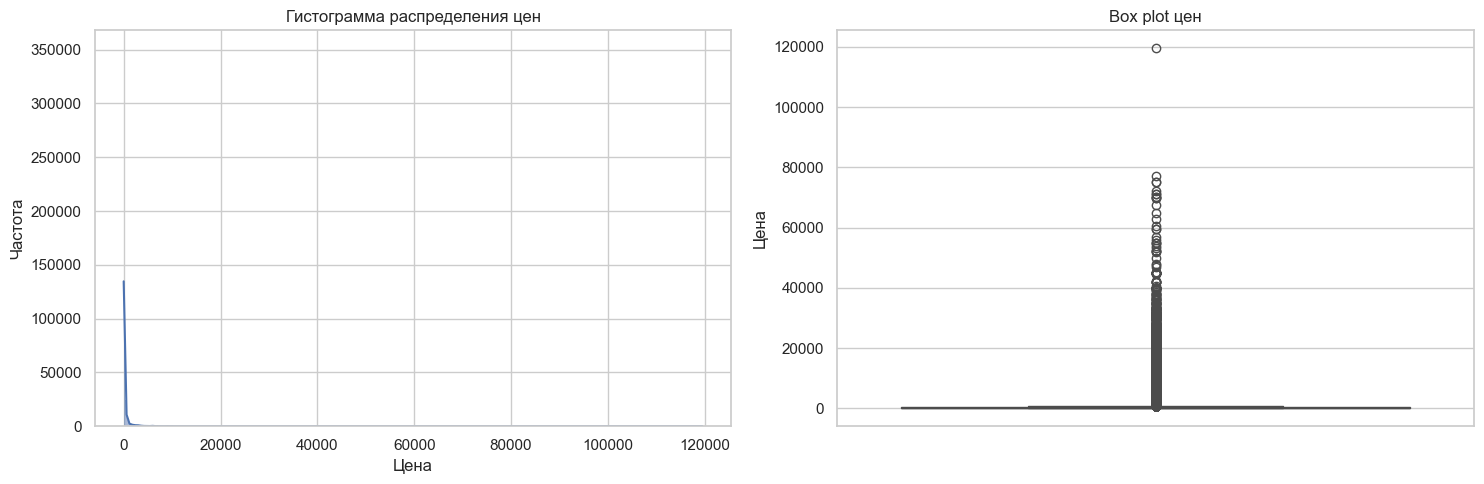

In [45]:
# %%
# ТОЧНО ПО ПРОМПТУ:

# 1. Выведи описательную статистику столбца 'price'
print("1. ОПИСАТЕЛЬНАЯ СТАТИСТИКА СТОЛБЦА 'price':")
print(f"Квартиль 25% (Q1): {df['price'].quantile(0.25):.2f}")
print(f"Квартиль 50% (медиана): {df['price'].quantile(0.50):.2f}")
print(f"Квартиль 75% (Q3): {df['price'].quantile(0.75):.2f}")
print(f"Минимум: {df['price'].min():.2f}")
print(f"Максимум: {df['price'].max():.2f}")

IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)
print(f"Межквартильный диапазон (IQR = Q3 - Q1): {IQR:.2f}")

print("\n" + "="*60 + "\n")

# 2. Рассчитай границы для потенциальных выбросов
lower_bound = df['price'].quantile(0.25) - 1.5 * IQR
upper_bound = df['price'].quantile(0.75) + 1.5 * IQR

print("2. ГРАНИЦЫ ДЛЯ ПОТЕНЦИАЛЬНЫХ ВЫБРОСОВ:")
print(f"lower_bound = Q1 - 1.5 * IQR: {lower_bound:.2f}")
print(f"upper_bound = Q3 + 1.5 * IQR: {upper_bound:.2f}")

print("\n" + "="*60 + "\n")

# 3. Подсчитай количество выбросов
outliers_below = df[df['price'] < lower_bound]
outliers_above = df[df['price'] > upper_bound]

print("3. КОЛИЧЕСТВО ВЫБРОСОВ:")
print(f"Выбросы ниже нижней границы: {len(outliers_below)}")
print(f"Выбросы выше верхней границы: {len(outliers_above)}")
print(f"Общее количество выбросов: {len(outliers_below) + len(outliers_above)}")

print("\n" + "="*60 + "\n")

# 4. Выведи примеры выбросов
print("4. ПРИМЕРЫ ВЫБРОСОВ:")

print("\n10 САМЫХ ДЕШЕВЫХ ВЫБРОСОВ:")
if len(outliers_below) > 0:
    print(outliers_below.nsmallest(10, 'price')[['item', 'quantity', 'amount', 'price']])
else:
    print("Нет выбросов ниже нижней границы")

print("\n10 САМЫХ ДОРОГИХ ВЫБРОСОВ:")
if len(outliers_above) > 0:
    print(outliers_above.nlargest(10, 'price')[['item', 'quantity', 'amount', 'price']])
else:
    print("Нет выбросов выше верхней границы")

print("\n" + "="*60 + "\n")

# 4. Создай визуализацию гистограммы и box plot
print("ВИЗУАЛИЗАЦИЯ:")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Гистограмма
sns.histplot(df['price'], kde=True, ax=ax1)
ax1.set_title('Гистограмма распределения цен')
ax1.set_xlabel('Цена')
ax1.set_ylabel('Частота')

# Box plot
sns.boxplot(data=df, y='price', ax=ax2)
ax2.set_title('Box plot цен')
ax2.set_ylabel('Цена')

plt.tight_layout()
plt.show()

Вижу! Вывод обрезается. Давай исправим - добавим настройки для полного отображения:

In [46]:
# %%
# Настройки для полного отображения данных
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

# 4. Выведи примеры выбросов
print("4. ПРИМЕРЫ ВЫБРОСОВ:")

print("\n10 САМЫХ ДЕШЕВЫХ ВЫБРОСОВ:")
if len(outliers_below) > 0:
    cheap_outliers = outliers_below.nsmallest(10, 'price')[['item', 'quantity', 'amount', 'price']]
    print(cheap_outliers.to_string())
else:
    print("Нет выбросов ниже нижней границы")

print("\n10 САМЫХ ДОРОГИХ ВЫБРОСОВ:")
if len(outliers_above) > 0:
    expensive_outliers = outliers_above.nlargest(10, 'price')[['item', 'quantity', 'amount', 'price']]
    print(expensive_outliers.to_string())
else:
    print("Нет выбросов выше верхней границы")

4. ПРИМЕРЫ ВЫБРОСОВ:

10 САМЫХ ДЕШЕВЫХ ВЫБРОСОВ:
Нет выбросов ниже нижней границы

10 САМЫХ ДОРОГИХ ВЫБРОСОВ:
            item  quantity  amount     price
734936   sku8449         1  119500  119500.0
242769   sku6834         1   76990   76990.0
153014  sku27261         1   74990   74990.0
847552   sku6834         1   74990   74990.0
713368   sku5775         1   71991   71991.0
704822   sku6834         1   71241   71241.0
766446   sku6834         1   71241   71241.0
222969  sku12045         1   69990   69990.0
624879  sku29862         1   69990   69990.0
648925   sku6834         1   69741   69741.0


"Выполни АВС-анализ товаров по сумме продаж:

Сгруппируй данные по item и рассчитай сумму продаж каждого товара

Отсортируй товары по сумме продаж в убывающем порядке

Рассчитай накопительный процент (cumulative %) для каждого товара:

Общая сумма всех продаж = total_sum

Для каждого товара: cumulative_sum / total_sum * 100

На основе накопительного процента распредели товары на группы:

Группа A: cumulative % <= 80%

Группа B: cumulative % > 80% and <= 95%

Группа C: cumulative % > 95%

Выведи количество товаров в каждой группе и примеры товаров из каждой группы"

In [47]:
# %%
# ТОЧНО ПО ПРОМПТУ:

# 1. Сгруппируй данные по item и рассчитай сумму продаж каждого товара
abc_analysis = df.groupby('item')['amount'].sum().reset_index()

# 2. Отсортируй товары по сумме продаж в убывающем порядке
abc_analysis = abc_analysis.sort_values('amount', ascending=False)

# 3. Рассчитай накопительный процент
total_sum = abc_analysis['amount'].sum()
abc_analysis['cumulative_sum'] = abc_analysis['amount'].cumsum()
abc_analysis['cumulative_percent'] = (abc_analysis['cumulative_sum'] / total_sum) * 100

# 4. Распредели товары на группы
def assign_abc_group(cumulative_percent):
    if cumulative_percent <= 80:
        return 'A'
    elif cumulative_percent <= 95:
        return 'B'
    else:
        return 'C'

abc_analysis['abc_group'] = abc_analysis['cumulative_percent'].apply(assign_abc_group)

print("ABC-АНАЛИЗ ТОВАРОВ ПО СУММЕ ПРОДАЖ:")
print(f"Общая сумма продаж: {total_sum:,.2f} руб")

print("\n" + "="*60 + "\n")

# 5. Выведи количество товаров в каждой группе и примеры товаров
print("РАСПРЕДЕЛЕНИЕ ТОВАРОВ ПО ГРУППАМ:")
abc_summary = abc_analysis['abc_group'].value_counts().sort_index()

for group in ['A', 'B', 'C']:
    count = abc_summary.get(group, 0)
    total_items = len(abc_analysis)
    percentage = (count / total_items) * 100
    
    print(f"\nГруппа {group}:")
    print(f"  Количество товаров: {count} ({percentage:.1f}% от всех товаров)")
    
    # Примеры товаров из группы
    group_items = abc_analysis[abc_analysis['abc_group'] == group].head(3)
    print(f"  Примеры товаров:")
    for _, row in group_items.iterrows():
        print(f"    - {row['item']}: {row['amount']:,.0f} руб")

ABC-АНАЛИЗ ТОВАРОВ ПО СУММЕ ПРОДАЖ:
Общая сумма продаж: 628,608,341.00 руб


РАСПРЕДЕЛЕНИЕ ТОВАРОВ ПО ГРУППАМ:

Группа A:
  Количество товаров: 5353 (17.5% от всех товаров)
  Примеры товаров:
    - sku26161: 5,373,638 руб
    - sku18199: 3,951,361 руб
    - sku21947: 3,918,570 руб

Группа B:
  Количество товаров: 8234 (26.9% от всех товаров)
  Примеры товаров:
    - sku10822: 22,836 руб
    - sku10724: 22,834 руб
    - sku29015: 22,826 руб

Группа C:
  Количество товаров: 16979 (55.5% от всех товаров)
  Примеры товаров:
    - sku13438: 5,357 руб
    - sku872: 5,357 руб
    - sku18189: 5,357 руб


"Дополни XYZ-анализ товаров (по количеству): Используй для расчета коэффициент вариации = std / mean * 100. На основе коэффициента вариации распредели товары:

Группа X: CV < 15%

Группа Y: 15% <= CV <= 25%

Группа Z: CV > 25%.
Выведи количество товаров в каждой группе и итоговый датафрейм."



In [48]:
# %%
# ТОЧНО ПО ПРОМПТУ:

# XYZ-анализ товаров по количеству (стабильность продаж)
xyz_analysis = df.groupby('item').agg({
    'quantity': ['mean', 'std']  # Среднее и стандартное отклонение по количеству
}).round(2)

# Упрощаем названия колонок
xyz_analysis.columns = ['mean_quantity', 'std_quantity']

# Рассчитываем коэффициент вариации (CV)
xyz_analysis['cv'] = (xyz_analysis['std_quantity'] / xyz_analysis['mean_quantity']) * 100

# Заменяем NaN значения (где mean = 0) на большое число
xyz_analysis['cv'] = xyz_analysis['cv'].fillna(999)

# Распределяем по группам XYZ
def assign_xyz_group(cv):
    if cv < 15:
        return 'X'
    elif cv <= 25:
        return 'Y'
    else:
        return 'Z'

xyz_analysis['xyz_group'] = xyz_analysis['cv'].apply(assign_xyz_group)

print("XYZ-АНАЛИЗ ТОВАРОВ (ПО СТАБИЛЬНОСТИ ПРОДАЖ):")

print("\n" + "="*60 + "\n")

# Выводим количество товаров в каждой группе
xyz_summary = xyz_analysis['xyz_group'].value_counts().sort_index()

for group in ['X', 'Y', 'Z']:
    count = xyz_summary.get(group, 0)
    total_items = len(xyz_analysis)
    percentage = (count / total_items) * 100
    
    print(f"Группа {group}:")
    print(f"  Количество товаров: {count} ({percentage:.1f}% от всех товаров)")
    
    # Примеры товаров из группы
    group_items = xyz_analysis[xyz_analysis['xyz_group'] == group].head(3)
    print(f"  Примеры товаров (CV):")
    for item, row in group_items.iterrows():
        print(f"    - {item}: CV = {row['cv']:.1f}%")

print("\n" + "="*60 + "\n")

# Выводим итоговый датафрейм
print("ИТОГОВЫЙ ДАТАФРЕЙМ XYZ-АНАЛИЗА (первые 10 строк):")
print(xyz_analysis.head(10))

XYZ-АНАЛИЗ ТОВАРОВ (ПО СТАБИЛЬНОСТИ ПРОДАЖ):


Группа X:
  Количество товаров: 8038 (26.3% от всех товаров)
  Примеры товаров (CV):
    - sku10002: CV = 0.0%
    - sku10003: CV = 0.0%
    - sku10005: CV = 0.0%
Группа Y:
  Количество товаров: 1304 (4.3% от всех товаров)
  Примеры товаров (CV):
    - sku10009: CV = 15.7%
    - sku10011: CV = 22.6%
    - sku10016: CV = 20.3%
Группа Z:
  Количество товаров: 21224 (69.4% от всех товаров)
  Примеры товаров (CV):
    - sku1: CV = 37.7%
    - sku10: CV = 61.0%
    - sku100: CV = 62.9%


ИТОГОВЫЙ ДАТАФРЕЙМ XYZ-АНАЛИЗА (первые 10 строк):
          mean_quantity  std_quantity          cv xyz_group
item                                                       
sku1               1.38          0.52   37.681159         Z
sku10              2.00          1.22   61.000000         Z
sku100             1.40          0.88   62.857143         Z
sku1000            1.27          0.67   52.755906         Z
sku10000           2.48          2.91  117.338710      

"Создай перекрестную таблицу (pivot table) ABC группа x XYZ группа для матрицы ABC-XYZ"

ОБЪЕДИНЕННЫЕ ДАННЫЕ ABC-XYZ (первые 10 строк):
           item abc_group xyz_group
17951  sku26161         A         Z
9108   sku18199         A         Z
13270  sku21947         A         Z
20133  sku28128         A         Z
28728   sku8342         A         Z
21796  sku29626         A         Z
29479   sku9018         A         Z
29981   sku9471         A         Z
16744  sku25074         A         Z
19760  sku27791         A         Z


МАТРИЦА ABC-XYZ (перекрестная таблица):
Количество товаров в каждой ячейке:
xyz_group     X    Y      Z
abc_group                  
A          1476  288   3589
B          2054  400   5780
C          4508  616  11855


ВИЗУАЛИЗАЦИЯ МАТРИЦЫ ABC-XYZ:


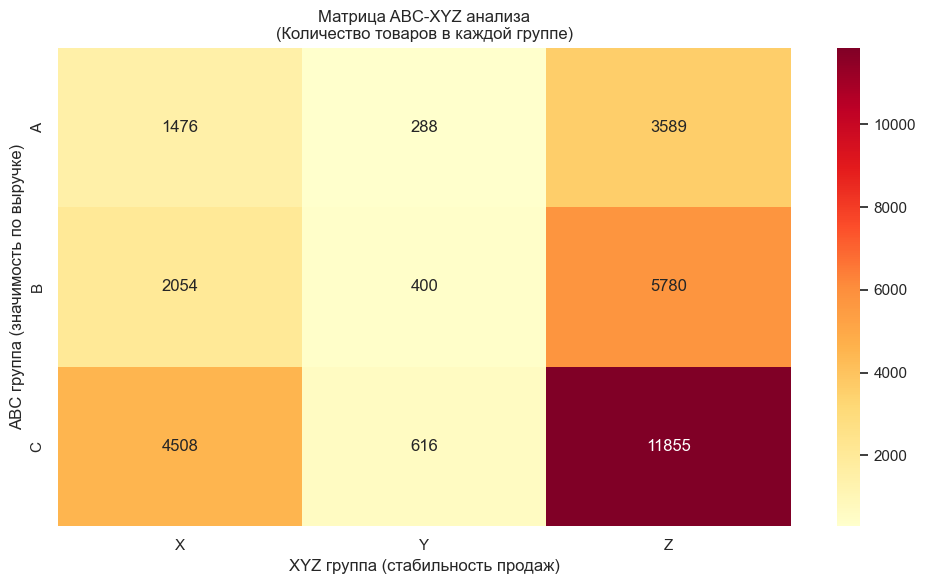



АНАЛИЗ РЕЗУЛЬТАТОВ:
Ключевые товары (A-X): высокодоходные со стабильным спросом
Проблемные товары (C-Z): низкодоходные с нестабильным спросом

Рекомендации по управлению товарным портфелем:
- Товаров A-X (ключевые): 1476 - максимальное внимание и наличие
- Товаров C-Z (проблемные): 11855 - рассмотреть возможность вывода


In [49]:
# %%
# ТОЧНО ПО ПРОМПТУ:

# Объединяем ABC и XYZ анализы
abc_xyz_combined = abc_analysis[['item', 'abc_group']].merge(
    xyz_analysis[['xyz_group']], 
    left_on='item', 
    right_index=True
)

print("ОБЪЕДИНЕННЫЕ ДАННЫЕ ABC-XYZ (первые 10 строк):")
print(abc_xyz_combined.head(10))

print("\n" + "="*60 + "\n")

# Создаем перекрестную таблицу (pivot table)
abc_xyz_matrix = pd.pivot_table(
    abc_xyz_combined,
    index='abc_group',
    columns='xyz_group',
    values='item',
    aggfunc='count',
    fill_value=0
)

print("МАТРИЦА ABC-XYZ (перекрестная таблица):")
print("Количество товаров в каждой ячейке:")
print(abc_xyz_matrix)

print("\n" + "="*60 + "\n")

# Визуализация матрицы
print("ВИЗУАЛИЗАЦИЯ МАТРИЦЫ ABC-XYZ:")
plt.figure(figsize=(10, 6))
sns.heatmap(abc_xyz_matrix, annot=True, fmt='d', cmap='YlOrRd', cbar=True)
plt.title('Матрица ABC-XYZ анализа\n(Количество товаров в каждой группе)')
plt.xlabel('XYZ группа (стабильность продаж)')
plt.ylabel('ABC группа (значимость по выручке)')
plt.tight_layout()
plt.show()

print("\n" + "="*60 + "\n")

# Анализ результатов
print("АНАЛИЗ РЕЗУЛЬТАТОВ:")
print("Ключевые товары (A-X): высокодоходные со стабильным спросом")
print("Проблемные товары (C-Z): низкодоходные с нестабильным спросом")
print("\nРекомендации по управлению товарным портфелем:")

# Анализируем ключевые группы
ax_count = abc_xyz_matrix.loc['A', 'X'] if 'A' in abc_xyz_matrix.index and 'X' in abc_xyz_matrix.columns else 0
cz_count = abc_xyz_matrix.loc['C', 'Z'] if 'C' in abc_xyz_matrix.index and 'Z' in abc_xyz_matrix.columns else 0

print(f"- Товаров A-X (ключевые): {ax_count} - максимальное внимание и наличие")
print(f"- Товаров C-Z (проблемные): {cz_count} - рассмотреть возможность вывода")

ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ: ABC-XYZ за последние 6 месяцев

In [50]:
# %%
# ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ:
# Повторить ABC-XYZ анализ, но только на данных за последние 6 месяцев

print("ABC-XYZ АНАЛИЗ ЗА ПОСЛЕДНИЕ 6 МЕСЯЦЕВ")
print("=" * 60)

# Используем уже отфильтрованные данные за последние 6 месяцев
print(f"Период анализа: с {start_date.date()} по {end_date}")
print(f"Количество транзакций: {len(filtered_df)}")
print(f"Количество уникальных товаров: {filtered_df['item'].nunique()}")

print("\n" + "="*60 + "\n")

# 1. ABC-анализ за последние 6 месяцев
abc_recent = filtered_df.groupby('item')['amount'].sum().reset_index()
abc_recent = abc_recent.sort_values('amount', ascending=False)

total_sum_recent = abc_recent['amount'].sum()
abc_recent['cumulative_sum'] = abc_recent['amount'].cumsum()
abc_recent['cumulative_percent'] = (abc_recent['cumulative_sum'] / total_sum_recent) * 100

abc_recent['abc_group'] = abc_recent['cumulative_percent'].apply(assign_abc_group)

print("ABC-АНАЛИЗ ЗА ПОСЛЕДНИЕ 6 МЕСЯЦЕВ:")
abc_summary_recent = abc_recent['abc_group'].value_counts().sort_index()

for group in ['A', 'B', 'C']:
    count = abc_summary_recent.get(group, 0)
    total_items = len(abc_recent)
    percentage = (count / total_items) * 100
    print(f"Группа {group}: {count} товаров ({percentage:.1f}%)")

print("\n" + "="*60 + "\n")

# 2. XYZ-анализ за последние 6 месяцев
xyz_recent = filtered_df.groupby('item').agg({
    'quantity': ['mean', 'std']
}).round(2)
xyz_recent.columns = ['mean_quantity', 'std_quantity']
xyz_recent['cv'] = (xyz_recent['std_quantity'] / xyz_recent['mean_quantity']) * 100
xyz_recent['cv'] = xyz_recent['cv'].fillna(999)
xyz_recent['xyz_group'] = xyz_recent['cv'].apply(assign_xyz_group)

print("XYZ-АНАЛИЗ ЗА ПОСЛЕДНИЕ 6 МЕСЯЦЕВ:")
xyz_summary_recent = xyz_recent['xyz_group'].value_counts().sort_index()

for group in ['X', 'Y', 'Z']:
    count = xyz_summary_recent.get(group, 0)
    total_items = len(xyz_recent)
    percentage = (count / total_items) * 100
    print(f"Группа {group}: {count} товаров ({percentage:.1f}%)")

print("\n" + "="*60 + "\n")

# 3. Матрица ABC-XYZ за последние 6 месяцев
abc_xyz_recent = abc_recent[['item', 'abc_group']].merge(
    xyz_recent[['xyz_group']], 
    left_on='item', 
    right_index=True
)

abc_xyz_matrix_recent = pd.pivot_table(
    abc_xyz_recent,
    index='abc_group',
    columns='xyz_group',
    values='item',
    aggfunc='count',
    fill_value=0
)

print("МАТРИЦА ABC-XYZ ЗА ПОСЛЕДНИЕ 6 МЕСЯЦЕВ:")
print(abc_xyz_matrix_recent)

print("\n" + "="*60 + "\n")

# 4. Сравнение с полным периодом
print("СРАВНЕНИЕ С ПОЛНЫМ ПЕРИОДОМ:")
print("Изменения в портрете товаров:")

# Сравниваем распределение по группам ABC
print("\nИзменения в ABC группах:")
for group in ['A', 'B', 'C']:
    count_full = abc_summary.get(group, 0)
    count_recent = abc_summary_recent.get(group, 0)
    change = count_recent - count_full
    change_percent = (change / count_full * 100) if count_full > 0 else 0
    print(f"Группа {group}: было {count_full}, стало {count_recent} ({change:+.0f}, {change_percent:+.1f}%)")

print("\nИзменения в XYZ группах:")
for group in ['X', 'Y', 'Z']:
    count_full = xyz_summary.get(group, 0)
    count_recent = xyz_summary_recent.get(group, 0)
    change = count_recent - count_full
    change_percent = (change / count_full * 100) if count_full > 0 else 0
    print(f"Группа {group}: было {count_full}, стало {count_recent} ({change:+.0f}, {change_percent:+.1f}%)")

ABC-XYZ АНАЛИЗ ЗА ПОСЛЕДНИЕ 6 МЕСЯЦЕВ
Период анализа: с 2019-04-30 по 2019-10-31
Количество транзакций: 350864
Количество уникальных товаров: 21824


ABC-АНАЛИЗ ЗА ПОСЛЕДНИЕ 6 МЕСЯЦЕВ:
Группа A: 3868 товаров (17.7%)
Группа B: 5795 товаров (26.6%)
Группа C: 12161 товаров (55.7%)


XYZ-АНАЛИЗ ЗА ПОСЛЕДНИЕ 6 МЕСЯЦЕВ:
Группа X: 6421 товаров (29.4%)
Группа Y: 577 товаров (2.6%)
Группа Z: 14826 товаров (67.9%)


МАТРИЦА ABC-XYZ ЗА ПОСЛЕДНИЕ 6 МЕСЯЦЕВ:
xyz_group     X    Y     Z
abc_group                 
A          1195  169  2504
B          1469  207  4119
C          3757  201  8203


СРАВНЕНИЕ С ПОЛНЫМ ПЕРИОДОМ:
Изменения в портрете товаров:

Изменения в ABC группах:
Группа A: было 5353, стало 3868 (-1485, -27.7%)
Группа B: было 8234, стало 5795 (-2439, -29.6%)
Группа C: было 16979, стало 12161 (-4818, -28.4%)

Изменения в XYZ группах:
Группа X: было 8038, стало 6421 (-1617, -20.1%)
Группа Y: было 1304, стало 577 (-727, -55.8%)
Группа Z: было 21224, стало 14826 (-6398, -30.1%)
